In [9]:
from tensorflow.keras import Sequential, datasets
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import numpy as np
from matplotlib import pyplot as plt

In [10]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 161s 1us/step


In [11]:
x_train.shape

(50000, 32, 32, 3)

In [12]:
x_test.shape

(10000, 32, 32, 3)

In [14]:
y_train = y_train.reshape(-1, )
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [17]:
y_classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [18]:
len(y_classes)

10

In [19]:
def showImage(x,y,index):
    plt.figure(figsize=(15, 2))
    plt.imshow(x[index])
    plt.xlabel(y_classes[y[index]])

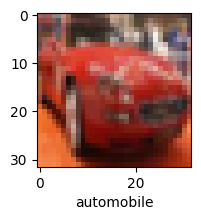

In [20]:
showImage(x_train, y_train,5)

In [21]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [22]:
x_train = x_train/255
x_test = x_test/255

In [23]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [24]:
 model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(4,4), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units=34, activation="relu"))
model.add(Dense(units=10, activation="softmax"))

C:\Users\user\Desktop\python\tfvenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
    )

In [27]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.3755 - loss: 1.7027 - val_accuracy: 0.5901 - val_loss: 1.1637
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.6085 - loss: 1.1203 - val_accuracy: 0.6465 - val_loss: 1.0243
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.6602 - loss: 0.9700 - val_accuracy: 0.6715 - val_loss: 0.9573
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.6856 - loss: 0.8976 - val_accuracy: 0.6813 - val_loss: 0.9296
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.7086 - loss: 0.8364 - val_accuracy: 0.6908 - val_loss: 0.8953


In [28]:
y_predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [29]:
y_predictions[9]

array([2.8546178e-03, 7.5235671e-01, 2.0747611e-04, 2.2012857e-04,
       2.5963294e-04, 1.4830874e-04, 2.4032560e-03, 7.3913514e-04,
       1.3552677e-03, 2.3945537e-01], dtype=float32)

In [30]:
y_predictions =[np.argmax(arr) for arr in y_predictions]

In [31]:
y_predictions

[np.int64(3),
 np.int64(8),
 np.int64(8),
 np.int64(0),
 np.int64(6),
 np.int64(6),
 np.int64(1),
 np.int64(6),
 np.int64(3),
 np.int64(1),
 np.int64(4),
 np.int64(9),
 np.int64(3),
 np.int64(7),
 np.int64(9),
 np.int64(6),
 np.int64(5),
 np.int64(7),
 np.int64(8),
 np.int64(6),
 np.int64(7),
 np.int64(2),
 np.int64(4),
 np.int64(9),
 np.int64(4),
 np.int64(4),
 np.int64(4),
 np.int64(0),
 np.int64(9),
 np.int64(6),
 np.int64(6),
 np.int64(4),
 np.int64(4),
 np.int64(3),
 np.int64(9),
 np.int64(3),
 np.int64(7),
 np.int64(9),
 np.int64(9),
 np.int64(5),
 np.int64(0),
 np.int64(6),
 np.int64(7),
 np.int64(6),
 np.int64(0),
 np.int64(9),
 np.int64(3),
 np.int64(7),
 np.int64(7),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(6),
 np.int64(3),
 np.int64(8),
 np.int64(8),
 np.int64(7),
 np.int64(5),
 np.int64(5),
 np.int64(3),
 np.int64(7),
 np.int64(5),
 np.int64(6),
 np.int64(0),
 np.int64(6),
 np.int64(2),
 np.int64(1),
 np.int64(0),
 np.int64(3),
 np.int64(7),
 np.int64(2),
 np.in

In [32]:
y_test = y_test.reshape(-1, )

In [34]:
y_predictions[3]

np.int64(0)

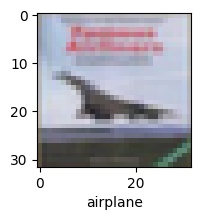

In [33]:
showImage(x_test, y_test, 3)